In [37]:
'''
Проект направлен на отслеживание влияния условий жизни учащихся в возрасте от 15 до 22 лет на их 
успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Для этого необходимо провести разведывательный анализ данных, чтобы опеределиться с параметрами будущей 
модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('D:\projects\skillfactory\module_2\stud_math.csv')

In [38]:
# Осмотрим датасет, имеем 13 числовых и 17 строковых столбцов.
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [39]:
# Переименуем для удобства некоторые столбцы
stud.rename(columns={'Pstatus': 'pstatus', 'Medu': 'mother_edu', 'Fedu': 'father_edu',
                     'Mjob': 'mother_job', 'Fjob': 'father_job'}, inplace=True)

In [40]:
# Данные взяты по ученикам от двух школ.
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


<AxesSubplot:xlabel='school', ylabel='score'>

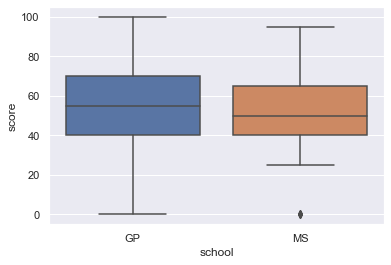

In [41]:
# В школе GP получают балл повыше.
sns.boxplot(x = 'school', y = 'score', data = stud)

In [42]:
# Девушек больше, чем парней.
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


<AxesSubplot:xlabel='sex', ylabel='score'>

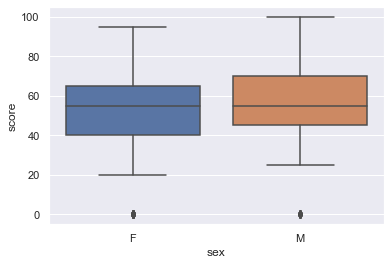

In [43]:
# Парни в среднем получают более высокий балл.
sns.boxplot(x = 'sex', y = 'score', data = stud)

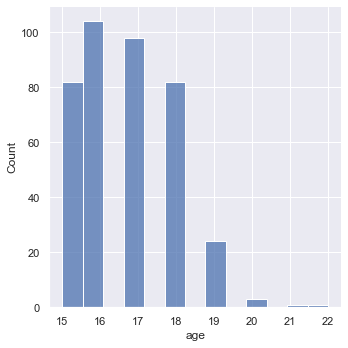

In [44]:
# Столбец с возрастом числовой и без пропусков, осмотрим распределение. Выбросов нет.
sns.set()
sns.displot(stud['age'])

<AxesSubplot:xlabel='age', ylabel='score'>

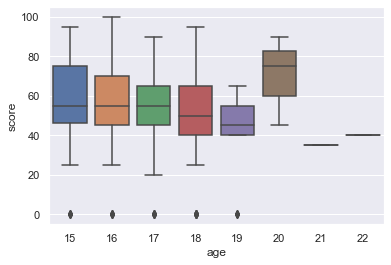

In [45]:
# Не похоже, что возраст влияет на балл. Уберем.
sns.boxplot(x = 'age', y = 'score', data = stud)

In [46]:
stud.drop(['age'], inplace = True, axis = 1)

In [47]:
# Известно, что городе проживает 295 учеников, за городом - 83.
# По 17 ученикам нет данных.
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


<AxesSubplot:xlabel='address', ylabel='score'>

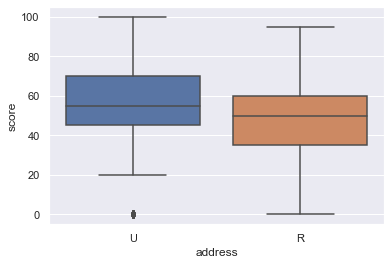

In [48]:
# Городские получают в среднем балл выше.
sns.boxplot(x = 'address', y = 'score', data = stud)

In [49]:
# 261 ученик проживает в семье больше трех человек, 107 до трех. По 27 ученикам нет данных.
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,261
LE3,107


<AxesSubplot:xlabel='famsize', ylabel='score'>

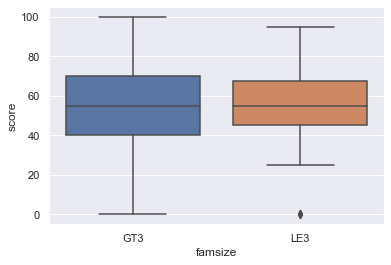

In [50]:
# В среднем не видно большой разницы в количестве человек в семье при влиянии на балл. Уберем столбец "famsize".
sns.boxplot(x = 'famsize', y = 'score', data = stud)

In [51]:
stud.drop(['famsize'], inplace = True, axis = 1)

In [52]:
# У 314 учеников родители живут вместе, у 36 раздельно. 45 учеников воздержались от предоставления информации.
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,314
A,36


<AxesSubplot:xlabel='pstatus', ylabel='score'>

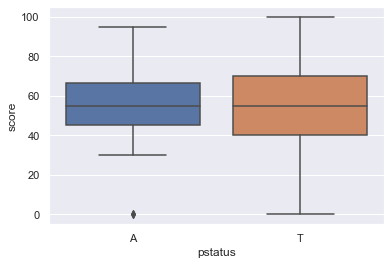

In [53]:
# Эта характеристика тоже лишняя.
sns.boxplot(x = 'pstatus', y = 'score', data = stud)

In [54]:
stud.drop(['pstatus'], inplace = True, axis = 1)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_edu, dtype: float64

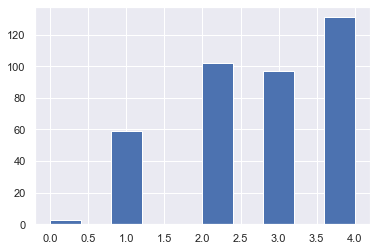

In [55]:
# Посмотрим распределение образования матерей. Данные есть по 392 ученикам, по 3 нет информации.
stud.mother_edu.hist()
stud.mother_edu.describe()

<AxesSubplot:xlabel='mother_edu', ylabel='score'>

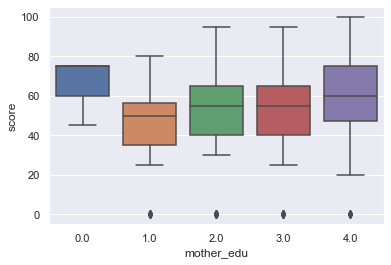

In [56]:
# Виден тренд на улучшение балла в зависимости от образования матери.
sns.boxplot(x = 'mother_edu', y = 'score', data = stud)

,father_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


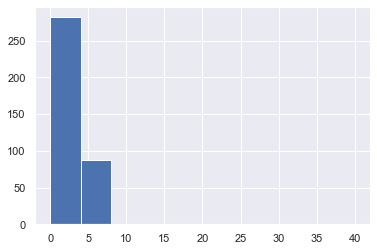

In [57]:
# Посмотрим распределение образования отцов. Максимум должен быть 4.0, видим выброс 40.0.
# Предположим, что это опечатка и исправим на 4.0
stud.father_edu.hist()
stud.father_edu.describe()
pd.DataFrame(stud.father_edu.value_counts())

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: father_edu, dtype: float64

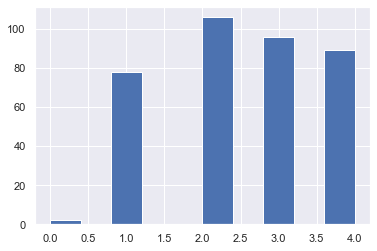

In [58]:
# Неожиданно, у отцов в среднем образование пониже, чем у матерей.
stud.loc[(stud.father_edu == 40.0), 'father_edu'] = 4.0
stud.father_edu.hist()
stud.father_edu.describe()

<AxesSubplot:xlabel='father_edu', ylabel='score'>

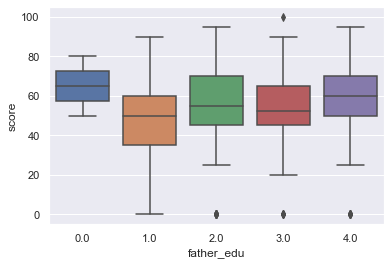

In [59]:
# И зависомость на балл небольшая. Уберем.
sns.boxplot(x = 'father_edu', y = 'score', data = stud)

In [60]:
stud.drop(['father_edu'], inplace = True, axis = 1)

count       376
unique        5
top       other
freq        133
Name: mother_job, dtype: object

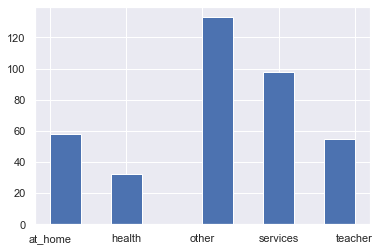

In [61]:
# Посмотрим рапределение занятости матерей.
pd.DataFrame(stud.mother_job.value_counts())
stud.mother_job.hist()
stud.mother_job.describe()

<AxesSubplot:xlabel='mother_job', ylabel='score'>

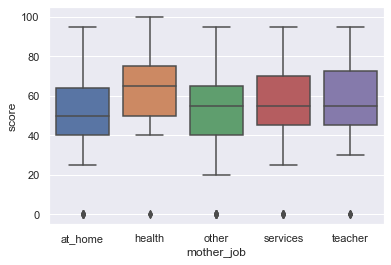

In [62]:
# Здравоохранение выделяется.
sns.boxplot(x = 'mother_job', y = 'score', data = stud)

count       359
unique        5
top       other
freq        197
Name: father_job, dtype: object

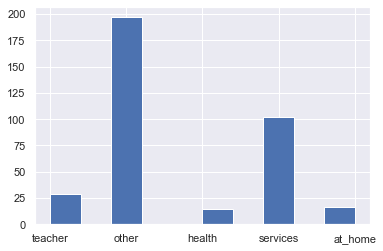

In [63]:
# Посмотрим рапределение занятости отцов.
pd.DataFrame(stud.mother_job.value_counts())
stud.father_job.hist()
stud.father_job.describe()

<AxesSubplot:xlabel='father_job', ylabel='score'>

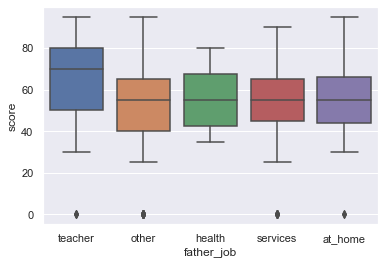

In [64]:
# А вот у отцов учителя. Логично.
sns.boxplot(x = 'father_job', y = 'score', data = stud)

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

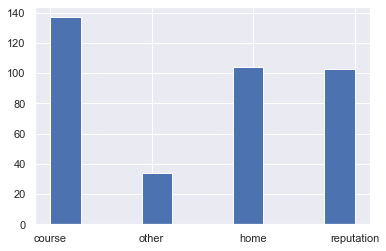

In [65]:
# Образовательная программа, близость к школе и репутация имеют почти равное значение для выбора места обучения.
pd.DataFrame(stud.reason.value_counts())
stud.reason.hist()
stud.reason.describe()

<AxesSubplot:xlabel='reason', ylabel='score'>

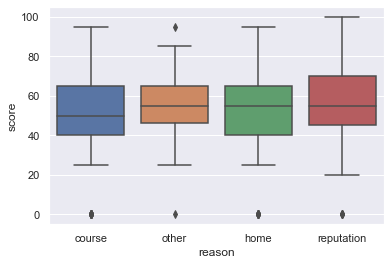

In [66]:
# Но по зависимости к баллу вряд ли. Уберем.
sns.boxplot(x = 'reason', y = 'score', data = stud)

In [67]:
stud.drop(['reason'], inplace = True, axis = 1)

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

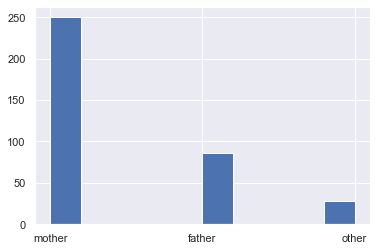

In [68]:
# В подавляющем большинстве опекуном ученика является мать.
pd.DataFrame(stud.guardian.value_counts())
stud.guardian.hist()
stud.guardian.describe()

<AxesSubplot:xlabel='guardian', ylabel='score'>

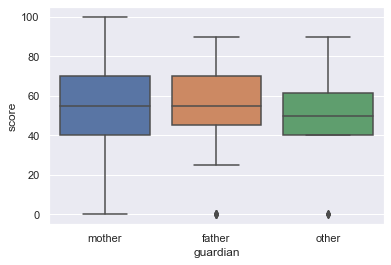

In [69]:
# Не показательно. Уберем.
sns.boxplot(x = 'guardian', y = 'score', data = stud)

In [70]:
stud.drop(['guardian'], inplace = True, axis = 1)

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

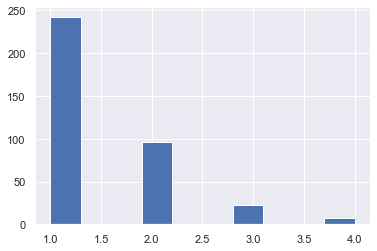

In [71]:
# Несмотря на причину выбора школы, мы видим, что все-таки подавляющее большинство учеников живет недалеко.
stud.traveltime.hist()
stud.traveltime.describe()

<AxesSubplot:xlabel='traveltime', ylabel='score'>

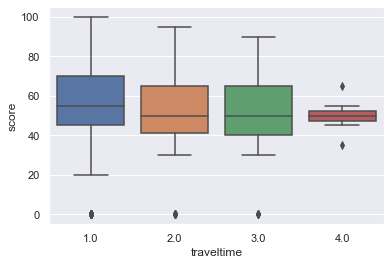

In [72]:
# В среднем одинаково. Думаю, при равных выборках было бы понятней. Уберем.
sns.boxplot(x = 'traveltime', y = 'score', data = stud)

In [73]:
stud.drop(['traveltime'], inplace = True, axis = 1)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

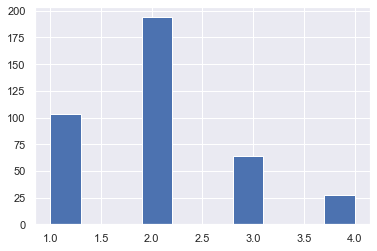

In [74]:
# В среднем помимо школы ученики уделяют от 2 до 5 часов обучению.
stud.studytime.hist()
stud.studytime.describe()

<AxesSubplot:xlabel='studytime', ylabel='score'>

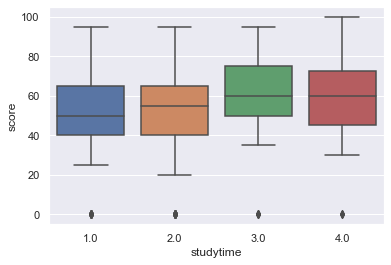

In [75]:
# Логично. Больше учишься, лучше результат.
sns.boxplot(x = 'studytime', y = 'score', data = stud)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

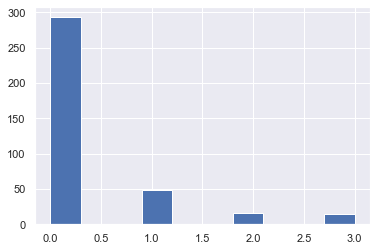

In [76]:
# Влияют ли внеучебные неудачи на успеваемость по математике? Посмотрим.
stud.failures.hist()
stud.failures.describe()

<AxesSubplot:xlabel='failures', ylabel='score'>

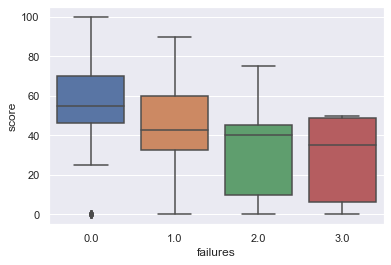

In [77]:
# Почти всю выборку на себя взял один показатель. Уберем.
sns.boxplot(x = 'failures', y = 'score', data = stud)

In [78]:
stud.drop(['failures'], inplace = True, axis = 1)

In [79]:
# 335 учеников не имеют дополнительной образовательной поддержки, 51 имеют. По 9 ученикам нет данных.
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,51


<AxesSubplot:xlabel='schoolsup', ylabel='score'>

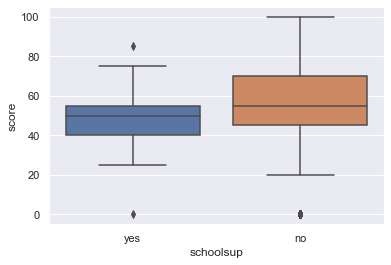

In [80]:
# Нелогично. Вероятно перекос выборки не показывает всю картину. Уберем.
sns.boxplot(x = 'schoolsup', y = 'score', data = stud)

In [81]:
stud.drop(['schoolsup'], inplace = True, axis = 1)

In [82]:
# 219 ученикам помогают дома с учебой, 137 самостоятельны, по 39 нет данных.
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,219
no,137


<AxesSubplot:xlabel='famsup', ylabel='score'>

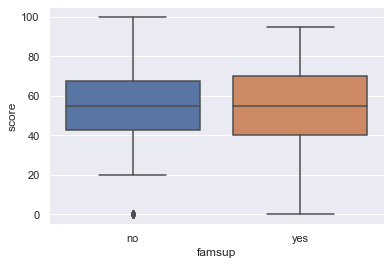

In [83]:
# Без особой разницы. Уберем.
sns.boxplot(x = 'famsup', y = 'score', data = stud)

In [84]:
stud.drop(['famsup'], inplace = True, axis = 1)

In [86]:
# 200 учеников не пользуются платными уроками по математике, 155 - пользуются, 40 - неизвестно. 
# Вероятно, важный пункт влияния на успеваемость.
pd.DataFrame(stud.paid.value_counts())

,paid
no,200
yes,155


<AxesSubplot:xlabel='paid', ylabel='score'>

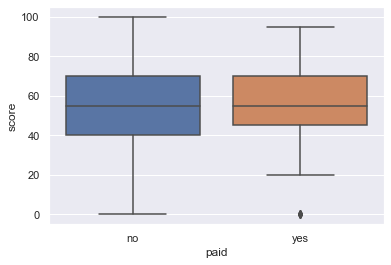

In [87]:
# А вот распределение по баллам говорит об обратном. Значит пользующиеся платными уроками дотягиваются 
# до уровня тех, кто и так понимает. Уберем из датафрейма.
sns.boxplot(x = 'paid', y = 'score', data = stud)

In [88]:
stud.drop(['paid'], inplace = True, axis = 1)

In [89]:
# Дополнительные внеучебные занятия берет половина учеников.
pd.DataFrame(stud.activities.value_counts())

,activities
yes,195
no,186


<AxesSubplot:xlabel='activities', ylabel='score'>

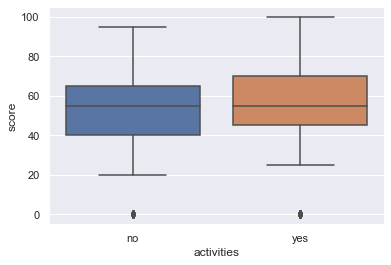

In [90]:
# В среднем большой разницы нет. Уберем.
sns.boxplot(x = 'activities', y = 'score', data = stud)

In [91]:
stud.drop(['activities'], inplace = True, axis = 1)

In [92]:
# В детский сад ходили 300 человек, 79 - не ходили. 16 - неизвестно.
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,300
no,79


<AxesSubplot:xlabel='nursery', ylabel='score'>

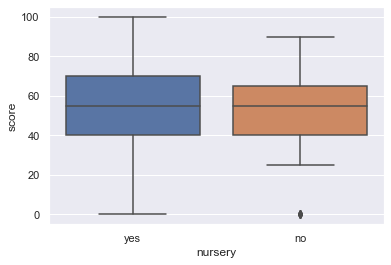

In [93]:
# Разницы на текущей выборке не видно. Уберем.
sns.boxplot(x = 'nursery', y = 'score', data = stud)

In [94]:
stud.drop(['nursery'], inplace = True, axis = 1)

In [95]:
# 356 учеников хотят получить высшее образование, 19 - не хотят, 20 - не определились.
pd.DataFrame(stud.higher.value_counts())

,higher
yes,356
no,19


<AxesSubplot:xlabel='higher', ylabel='score'>

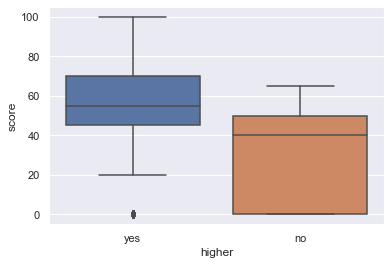

In [96]:
# Желание сильная штука. Учтем эти данные.
sns.boxplot(x = 'higher', y = 'score', data = stud)

In [97]:
# Интернет дома есть у 305 учеников, у 56 нет, 34 - не указали информацию.
pd.DataFrame(stud.internet.value_counts()) 

,internet
yes,305
no,56


<AxesSubplot:xlabel='internet', ylabel='score'>

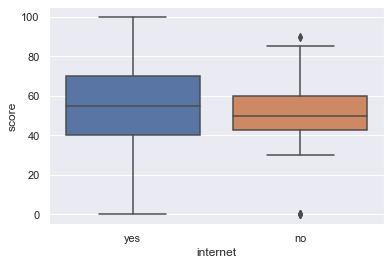

In [98]:
# Интернет помогает.
sns.boxplot(x = 'internet', y = 'score', data = stud)

In [99]:
# У 240 учеников нет отношений, у 124 есть. 31 - воздержались от ответа.
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,124


<AxesSubplot:xlabel='romantic', ylabel='score'>

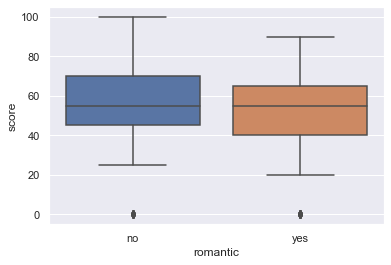

In [100]:
# Небольшой перекос в сторону тех, кому есть чем заняться помимо учебы, имеется. Учтем эти данные.
sns.boxplot(x = 'romantic', y = 'score', data = stud)

In [101]:
# Шкала оценки семейных отношений от 1 до 5, выброс -1 - вероятно "хуже некуда" или опечатка, исправим на 1.
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

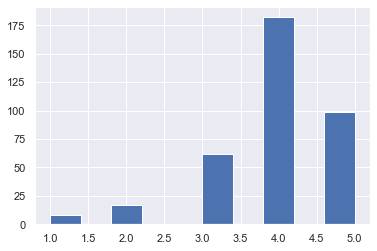

In [102]:
# Посмотрим, как ученики оценивают семейные отношения.
stud.loc[(stud.famrel < 1.0), 'famrel'] = 1.0
stud.famrel.hist()
stud.famrel.describe()

<AxesSubplot:xlabel='famrel', ylabel='score'>

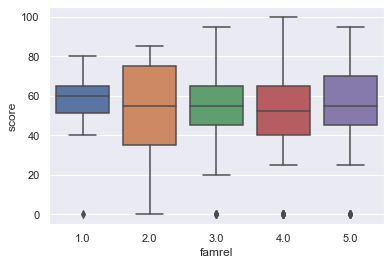

In [103]:
# Особо не за что зацепиться, уберем.
sns.boxplot(x = 'famrel', y = 'score', data = stud)

In [104]:
stud.drop(['famrel'], inplace = True, axis = 1)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

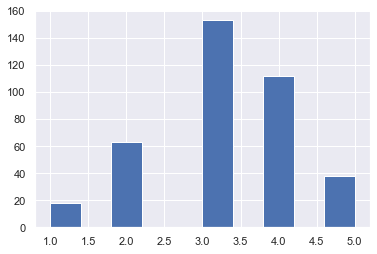

In [105]:
# Посмотрим распределение свободного времени. Выбросов нет.
stud.freetime.hist()
stud.freetime.describe()

<AxesSubplot:xlabel='freetime', ylabel='score'>

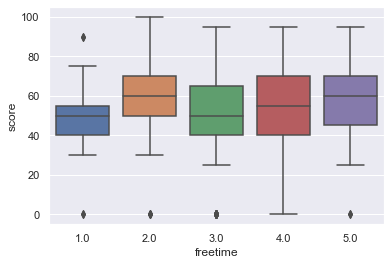

In [106]:
# Определенного тренда не видно. Уберем.
sns.boxplot(x = 'freetime', y = 'score', data = stud)

In [107]:
stud.drop(['freetime'], inplace = True, axis = 1)

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

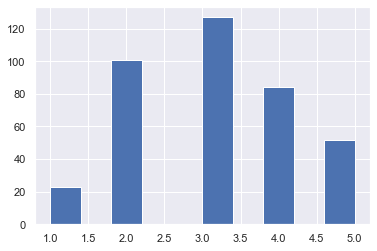

In [108]:
# Посмотрим, как распределено проведение времени с друзьями. График похож на распределение свободного времени.
stud.goout.hist()
stud.goout.describe() 

<AxesSubplot:xlabel='goout', ylabel='score'>

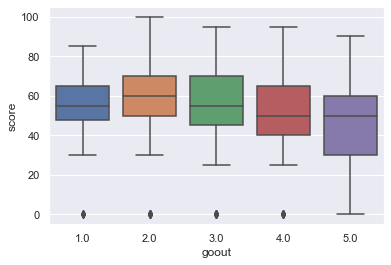

In [270]:
# Но в отличие от предыдущего показателя, здесь намечается тренд. Оставим для модели.
sns.boxplot(x = 'goout', y = 'score', data = stud)

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

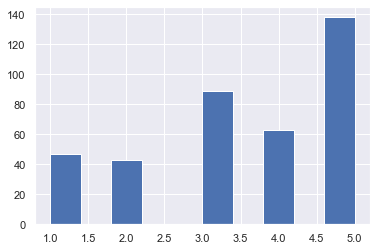

In [109]:
# Посмотрим, как оценивается состояние здоровья учеников.
stud.health.hist()
stud.health.describe() 

<AxesSubplot:xlabel='health', ylabel='score'>

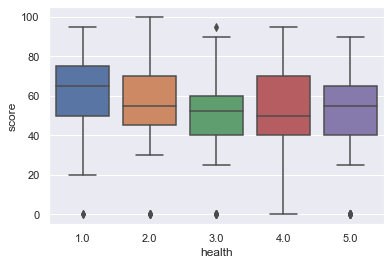

In [110]:
# Вероятно на балл по математике не сильно влияет здоровье. Уберем.
sns.boxplot(x = 'health', y = 'score', data = stud)

In [111]:
stud.drop(['health'], inplace = True, axis = 1)

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

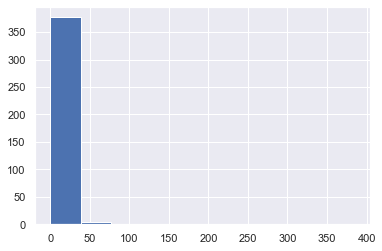

In [112]:
# Большой размах данных в колонке пропущенных занятий. Отфильтруем выбросы, воспользовавшись
# формулой интерквартильного расстояния.
stud.absences.hist()
stud.absences.describe() 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


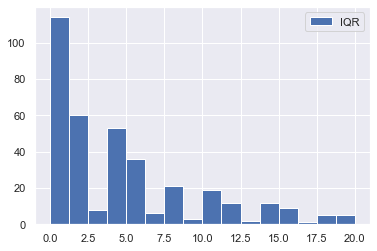

In [113]:
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, label = 'IQR')
 
plt.legend()

In [114]:
# Оставим для модели до 20 пропущенных занятий.
stud = stud.loc[stud.absences <= 20]

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


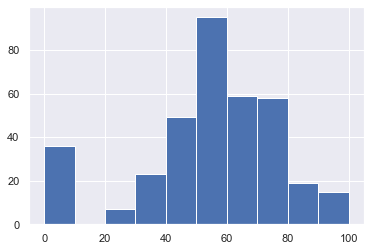

In [115]:
# Осмотрим самую важную характеристику - баллы по экзамену. 
# Очевидно, была использована стобальная шкала оценок и нет выбросов. Проверим.
stud.score.hist()
stud.score.describe()
pd.DataFrame(stud.score.value_counts())

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


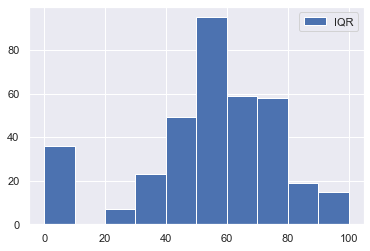

In [116]:
# Графики идентичны. Тем не менее здравый смысл подсказывает, что набрать ноль баллов на стобальной шкале 
# крайне маловероятно, тем более десяти процентам учеников.
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), label = 'IQR')
 
plt.legend();

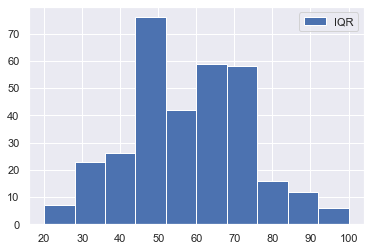

In [119]:
# Уберем нулевые оценки из модели. Следующий минимум - 20 баллов.
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (20, 100), label = 'IQR')
 
plt.legend();

In [120]:
# Отфильтируем лишние оценки.
stud = stud.loc[stud.score >= 20]

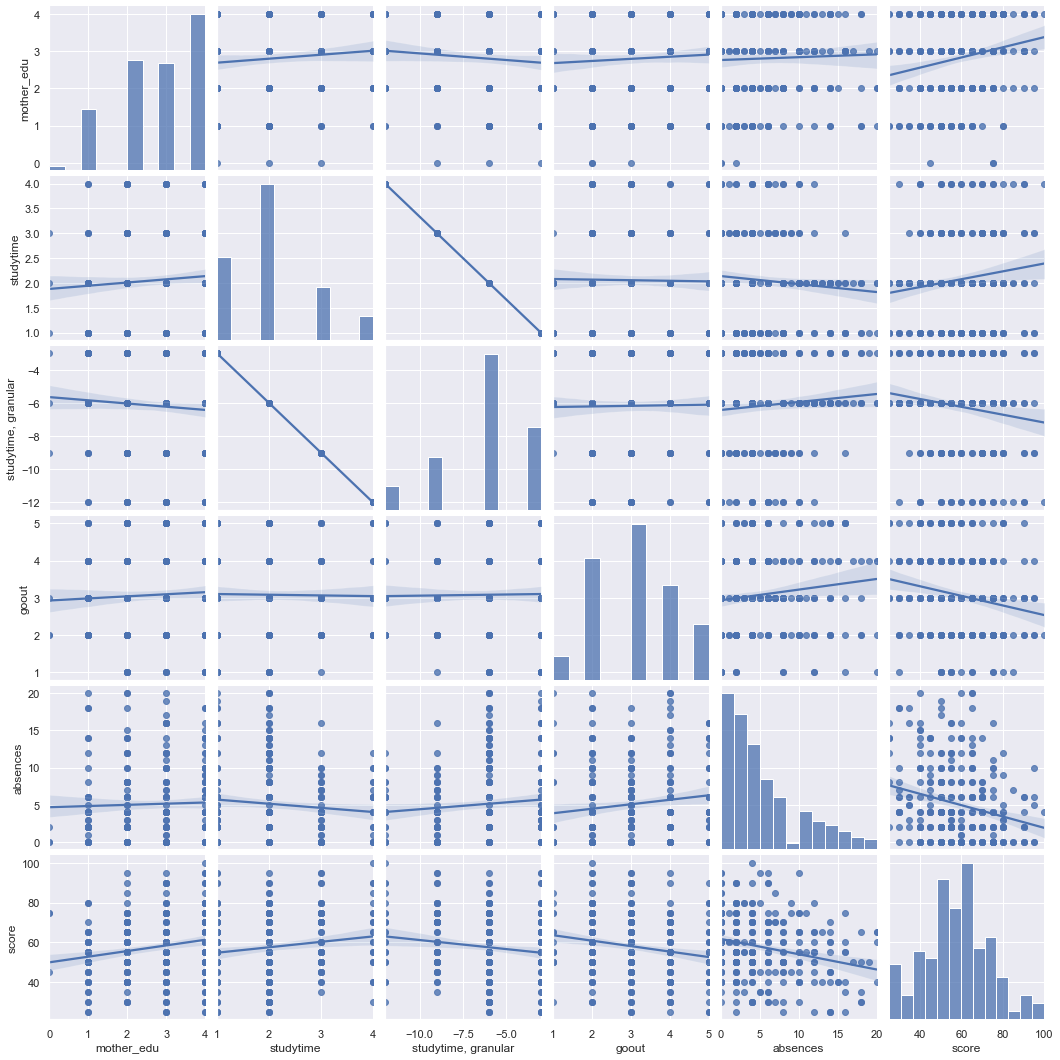

In [121]:
# Сравним численные параметры.
sns.pairplot(stud, kind = 'reg')

In [288]:
# Проверим корреляцию данных.
stud.corr()

,mother_edu,studytime,goout,absences,score
mother_edu,1.000000,0.082937,0.056421,0.034569,0.197099
studytime,0.082937,1.000000,-0.014917,-0.094304,0.147275
goout,0.056421,-0.014917,1.000000,0.131236,-0.188648
absences,0.034569,-0.094304,0.131236,1.000000,-0.242220
score,0.197099,0.147275,-0.188648,-0.242220,1.000000


In [122]:
# Уберем "studytime, granular". Все остальные переменные не коррелируют.
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [123]:
# Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам неразличимы:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'mother_job', 'father_job', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_job


In [ ]:
'''
В данном проекте переменные, которые, возможно, оказывают влияние на оценку, это: 
sex, address, mother_job, mother_edu, studytime, goout, absences.
'''